<a href="https://colab.research.google.com/github/code4tomorrow/machine-learning/blob/main/Exponential_and_Sigmoid_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning: Non-Linear Regression**

### **Data and Imports**

Run the below code, and upload the coronavirus data set.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving corona_denmark - corona_denmark (2).csv to corona_denmark - corona_denmark (2).csv


Here, we import all the libraries we'll need, and initialize the Dataframe with the *.csv*.

You will notice SciPy as a new import. SciPy is a mathematical library for optimization. We'll be using it to fit all kinds of models to data.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
coronaDf = pd.read_csv("corona_denmark - corona_denmark (2).csv")

Let's see what this Dataframe looks like. As it turns out, this is a relatively small dataset, so it's only about 16 days of data. It's been edited so that now the only columns are the day count, and the number of cases confirmed.

In [ ]:
coronaDf

,Date,Confirmed Cases
0,0,1
1,1,2
2,2,3
3,3,4
4,4,4
5,5,10
6,6,15
7,7,20
8,8,23
9,9,29


### **Train-Test Split**

Here, let's take the relevant columns from coronaDf and convert it to the NumPy arrays for inputs and outputs. This is not a normal step, but since we have little data, we are going to both plot and evaluate the model based on the entire data set, and we will need this for that.

In [ ]:
days = np.asanyarray(coronaDf[["Date"]])
cases = np.asanyarray(coronaDf[["Confirmed Cases"]])

Then, let's use a mask to perform train-test split.

In [ ]:
msk = np.random.rand(len(coronaDf))<0.8
train = coronaDf[msk]
test = coronaDf[~msk] 

Now, split into train-test arrays for inputs and outputs.

In [ ]:
train_day = np.asanyarray(train[["Date"]])
test_day = np.asanyarray(test[["Date"]])
train_confirmed_cases = np.asanyarray(train[["Confirmed Cases"]])
test_confirmed_cases = np.asanyarray(test[["Confirmed Cases"]])

### **Function 1: Exponential**

Here, we have to create a function to perform the exponential function. We will optimize the model from here.

In [ ]:
def exponential(x,a,b,c):
  return a*np.exp(b*x) + c

This is just a syntactic step, but since these arrays are still 2D, we want to make them 1D, so we just the take the first (and only) column out of them.

In [ ]:
train_day = train_day[:,0]
train_confirmed_cases = train_confirmed_cases[:,0]

### **Curve Fitting**

The *scipy.optimize* library contains the function *curve_fit*. We will now use this to optimize for our current function. You will see that this is very generalizable, and can be easily done for different functions. The *curve_fit* function produces two returns. One of them contains optimal parameters for the function and the other is a number called the covariance. This isn't very important or useful though, so don't worry about it.

In [ ]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(exponential, train_day, train_confirmed_cases)

### **Testing and Visualization**

Here, let's scatter and plot the data and model. As we saw earlier, we're going to do this on the entire data set.

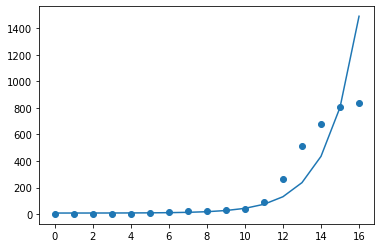

In [ ]:
plt.scatter(days,cases)
plt.plot(days,exponential(days,*popt))

Here, we evaluate the model via Mean Absolute Error and R^2 Score. This was done on the test data set, since checking on the training set would be redundant.

In [ ]:
from sklearn.metrics import r2_score
print(np.mean(np.absolute(test_confirmed_cases-exponential(test_day,*popt))))#Mean Absolute Error
print(r2_score(test_confirmed_cases,exponential(test_day,*popt)))

191.23832393968434
0.14728330089852582


### **Function 2: Sigmoid**

Don't worry too much about the naming of functions, there are confusing terms, and ocassionaly contradicting ones at that. Instead, just think about functions individually, not on the level of their names. The function definition for *sigmoid* is given below. You will find that it is a much more accurate model. It's your turn! Refer to what we did above, and implement the most accurate model for sigmoid function. Plot it, and evaluate it: how much better is it?

In [ ]:
def sigmoid(x,l,b,k):
  return (l/(1+b*np.exp(-1*k*x)))

Here, implement a curve fitting, and store the optimal parameter and covariance in poptTwo,pcovTwo. 

In [ ]:
from scipy.optimize import curve_fit
popt,pcov = curve_fit(sigmoid,train_day,train_confirmed_cases)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Now, scatter the entire data set, and then plot the model.

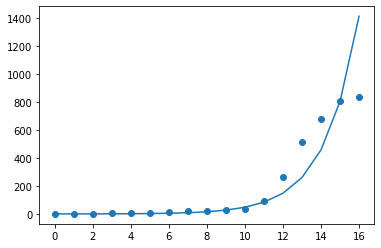

In [ ]:
plt.scatter(days,cases)
plt.plot(days, sigmoid(days,*popt))

Evaluate the model via Mean Absolute Error and R^2 Score. Refer back to the Evaluation Metrics Chapter: is this model better than the exponential one, and if so, by how much?

In [ ]:
from sklearn.metrics import r2_score
print(np.mean(np.absolute(test_confirmed_cases-sigmoid(test_day,*popt))))#Mean Absolute Error
print(r2_score(test_confirmed_cases,sigmoid(test_day,*popt)))

168.3914511629924
0.3287589526215031


And that's it! In principal, now you should be able to optimize for any kind of model. This is also the end of this course. Congratulations, you made it to the end! 

Now that you have the skills, you can try working on Regression data sets on Kaggle. Kaggle is a professional competitional platform for Machine Learning. You'll find it very useful for practice. The data sets for most of the notebooks in this Course were from there: with the exception of the first data set. 
Good Luck!